# CSI-777 Homework 1


![humidity art](https://cdn.iconscout.com/icon/premium/png-256-thumb/temperature-humidity-3524471-2948486.png)

## Goal: 

The overall goal for the first homework is simple. Filter out all of the days that have high humidity with the data that has been given. It is a simple assignment, yet complex as it does not define what "high humidity" techincally is.

## Background Research:

**Defining High Humidity:** 
- According to [howstuffworks](https://science.howstuffworks.com/nature/climate-weather/atmospheric/question651.htm) (a blog about random science factoids) "most people feel comfortable between 30% and 50% humidity" if we were to use this definition **High Humidity would be any relative humidity over 50%**.

- Statistically we could also look at the distribution based on the data given and remove the statistically significant outliers (although this is limiting as our data may not be representative of the weather overall)

- Another interesting approach to the problem is to look at the reason for defining high humidity. Is it to determine if kids can play a game outside? This would be inferred based on the "play" column within the data set. If this is the case "high humidity" could be defined as temperatures where kids can't play outside.

## Methodology:

1) Define High Humidity.

2) Clean the data.

3) Return a filtered dataset with the high humidity values removed.


### Cleaning the Data

This is also an interesting problem (thank you Bill) every dataset has some element of dirtiness to it. Sometimes it's null values, sometimes it's sensor errors, sometimes it's inconsistency in convention. Fortunately for this homework all of these issues are prevalent within the data. 

- **Null Values:** Within our dataset there is a null value within the temperature column

- **Sensor Errors:** We see this in our dataset as one of the temperatures is -40. We can infer this is a sensor error as according to this the kids played outside yet if it was -40 no one would be doing anything outside.

- **Inconsistent Convention:** We see this multiple times within our dataset as within the outlook column we can see rainy and rainz as options. In addition to this we see a 0 within the windy column when everything else is classified as a boolean value

#### How Do we clean up this data?

This is difficult and at the end of the day we will have to make some assumptions. 

- **outlook column**: Seeing as the only categories are sunny, overcast, rainy and rainz we will assume this was an input typo and replace rainz with rainy.

- **temperature column**: It is incredibly difficult to replace a null value in this data. One potential way could be to try and plot the temperature columns

- **humidity column**: As far as I can tell there is nothing particularly wrong with this column

- **windy column**: Seeing as the windy column is a boolean value and a 0 maps to false in traditional CS we will assume that this value is false.

- **play column**: For this we see a null value and this is difficult again to replace. Could follow the model approach but this would also potentially be inconsistent






In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
df = pd.read_csv('data/weather.txt')
df

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85,FALSE,no
1,sunny,80.0,90,TRUE,no
2,overcast,83.0,86,0,yes
3,rainy,70.0,96,FALSE,NaN
4,rainy,68.0,80,FALSE,yes
5,rainz,65.0,70,TRUE,no
6,overcast,NaN,65,TRUE,yes
7,sunny,72.0,95,FALSE,no
8,sunny,-40.0,70,FALSE,yes
9,rainy,75.0,80,FALSE,yes


### Clean the data

In [3]:
df['outlook'] = df['outlook'].apply(lambda r: 'rainy' if r == 'rainz' else r)
df['windy'] = df['windy'].apply(lambda r: 'FALSE' if r == '0' else r)
df['windy'] = df['windy'].apply(lambda r: False if r == 'FALSE' else True)

df = df.drop(8, axis=0)
df = df.dropna()


### Apply Heat index to the data

In [4]:
# https://climate.ncsu.edu/blog/2014/06/how-hot-does-it-feel-outside-heat-index-explained/
def calc_heatindex(T, RH):
    HI = -42.38 + (2.049*T) + (10.14*RH) - (0.2248 * T * RH) - (0.006838*(T**2)) - (.05482 * (RH**2)) + (0.001229 * (T**2) * RH) + (0.0008528 * T * (RH**2)) - (0.00000199
* (T**2) * (RH**2))
    return HI

df['heat_index'] = df.apply(lambda r: calc_heatindex(r['temperature'], r['humidity']), axis=1)

## Visualize the data

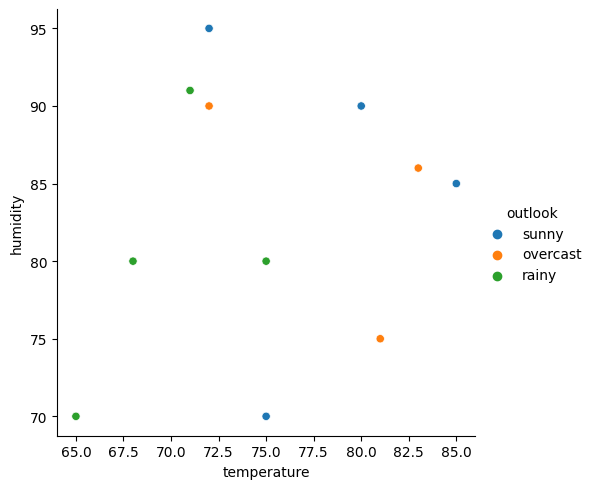

In [5]:
%matplotlib inline
sns.relplot(data=df, x='temperature', y='humidity',hue='outlook')

Interestingly it appears that there is no discernable trend mappin the temperature/humidity with an outlook. Also interesting is that the highest humidity days tend to correspond with a sunny outlook which we would not expect.

<AxesSubplot:xlabel='play', ylabel='humidity'>

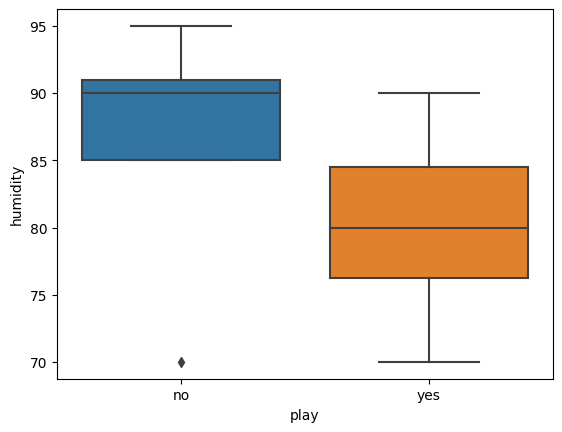

In [6]:
%matplotlib inline
sns.boxplot(data=df, x='play', y='humidity')

In general it appears that people don't tend to play when humidity is higher with the exception of one outlier which they didn't play even though it was a cool day.

<AxesSubplot:xlabel='outlook', ylabel='humidity'>

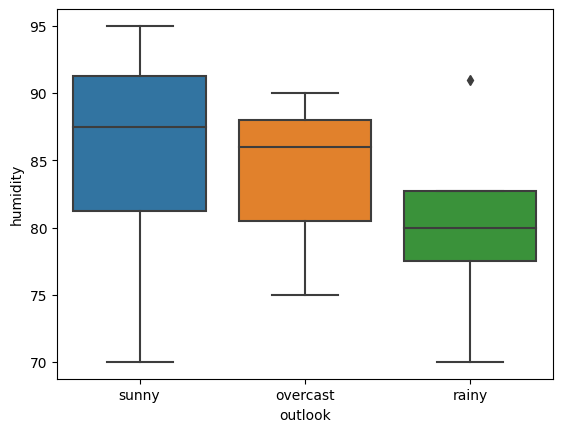

In [7]:
%matplotlib inline
sns.boxplot(data=df, x='outlook', y='humidity')

Again strangely the lowest humidity days tend to be the rainy outlook days. This is a strange situation.

## Defining High Humidity

I believe that it is important to ask why we are trying to define high humidity. Based on what I can infer the main question appears to be defining high humidity so that we can determine if kids should be playing or not (hence the play column) again **This is a total assumption and that will make an ass out of u and me**. We will continue on this though as we have to scope this out somehow and this seems to be the most fun. After doing our background research we can see that high humidity is technically defined as anything over about 50% relative humidity. Great! we can drop all of our values and call it a day. Except people can still play in relatively high humidity. What people cannot play in is rainy conditions and in conditions where the "real feel" is so high that they shouldn't be playing. We will use a chart from the New York Public Health for Student Safety Authority to define this (although there are many different versions across the nation and they conflict). 

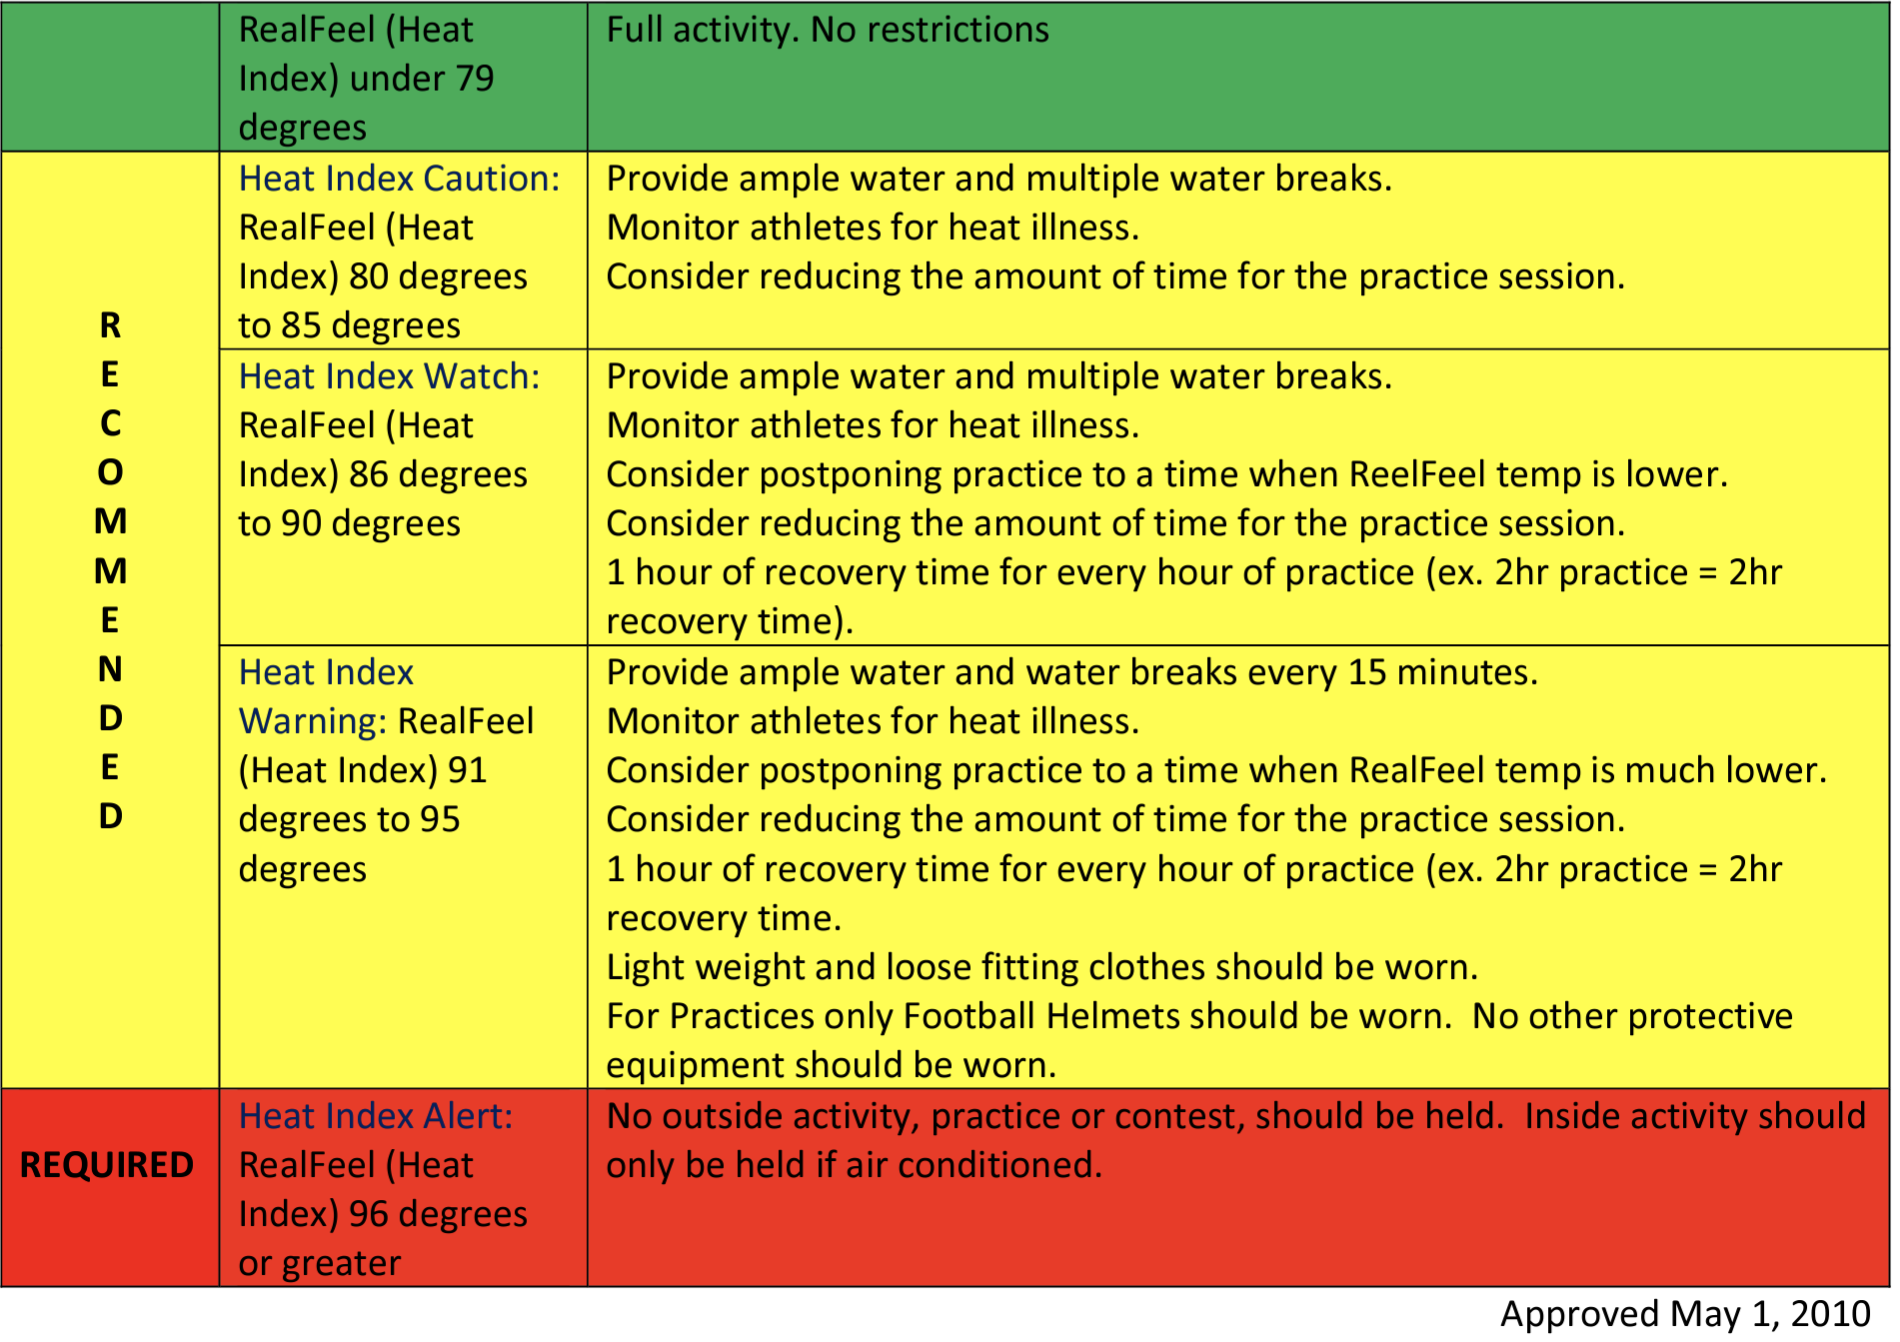

As we can see anything over a heat index of 80 degrees should be considered as a warning. This will be our threshold. We will also drop our days where the outlook is rainy as we cannot determine if the sports day was cancelled due to rain or due to high humidity / heat. So if we are only returning the high humidity days the ones with a rainy outlook won't count towards this.

### Heat Index Formula

Developed years ago this is the industry standard for heat index and was found [here](https://climate.ncsu.edu/blog/2014/06/how-hot-does-it-feel-outside-heat-index-explained/).

In [24]:
def calc_heatindex(T, RH):
    HI = -42.38 + (2.049*T) + (10.14*RH) - (0.2248 * T * RH) - (0.006838*(T**2)) - (.05482 * (RH**2)) + (0.001229 * (T**2) * RH) + (0.0008528 * T * (RH**2)) - (0.00000199
* (T**2) * (RH**2))
    return HI

In [25]:
df['heat_index'] = df.apply(lambda r: calc_heatindex(r['temperature'], r['humidity']), axis=1)

## Visualize the days where it felt hotter than the actual temperature due to humidity

(63.92132400000014, 101.63213125000004)

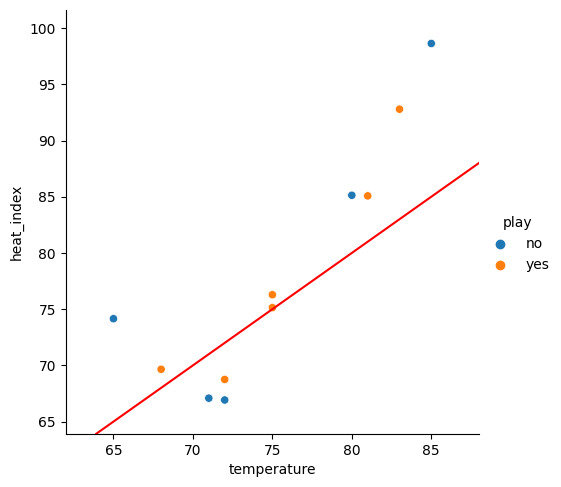

In [26]:
sns.relplot(data=df, x='temperature', y='heat_index', hue='play')
plt.axline((0, 0), slope=1., color='red', label='by slope')
plt.xlim(df['temperature'].min() - 3, df['temperature'].max()+3)
plt.ylim(df['heat_index'].min()-3, df['heat_index'].max() + 3)

## Filter out the rainy days

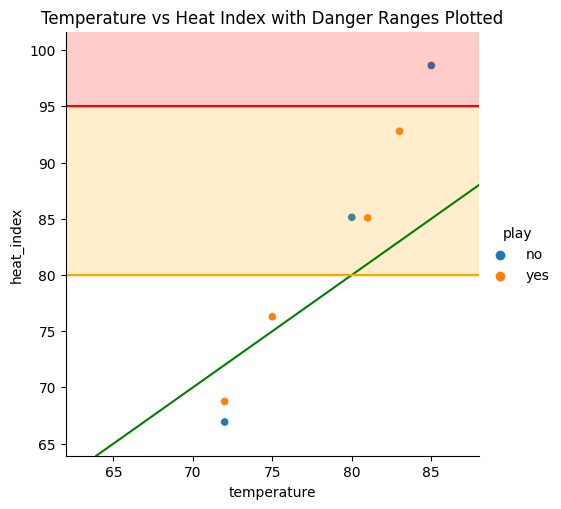

In [50]:
sns.relplot(data = df[df['outlook'] != 'rainy'], x='temperature', y='heat_index', hue='play')
plt.axline((0, 0), slope=1., color='green')
plt.xlim(df['temperature'].min() - 3, df['temperature'].max()+3)
plt.ylim(df['heat_index'].min()-3, df['heat_index'].max() + 3)
plt.axline((0, 95), slope=0, color='red')
plt.axline((0, 80), slope=0, color='orange')
plt.title("Temperature vs Heat Index with Danger Ranges Plotted")
rect=patches.Rectangle((60,80),30,15, 
                        fill=True,
                        color="orange",
                       alpha=0.2,
                       linewidth=2)
rect2=patches.Rectangle((60,95),30,15, 
                        fill=True,
                        color="red",
                       alpha=0.2,
                       linewidth=2)
plt.gca().add_patch(rect)
plt.gca().add_patch(rect2)

We can see in the chart above there are 4 points that fall within our threshold amount so we will remove these points and call it a day! Note that the green line is the temperature vs the heat index so anything above the line is a point where the temperature feels higher than it actually is due to humidity.

## Remove the indices of the "High Humidity" Events and write to txt.

In [55]:
final = pd.read_csv('data/weather.txt')

In [59]:
final = final.drop(df[df['heat_index'] > 80].index)

In [ ]:
final.to_csv('data/low_humidity')